# Codes used in the paper titled "Compiling catalogues of OB stars and calculation of Solar Offset

## Aitoff Projection on l-b Galactic Plane

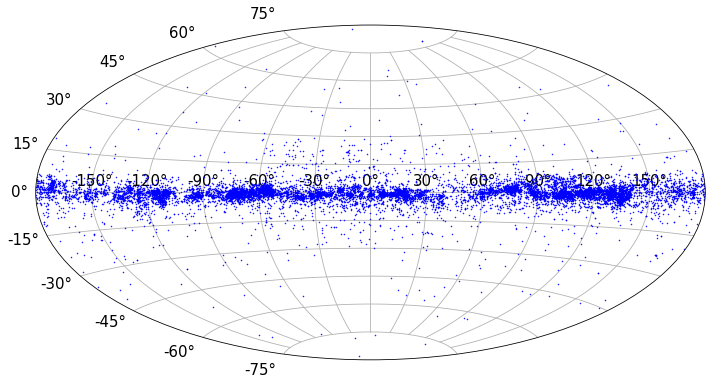

In [25]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd                #import desired libraries

df = pd.read_csv('Obfinew.csv')    #read the file you want to read using pandas

l = df['l(deg)']                   #define your columns from the dataframe that provide you l and b values 
b = df['b(deg)']

                                                            
c = SkyCoord(ra=l, dec=b, frame='icrs',unit = 'deg')  #convert the scale into -180 to +180 degrees using astropy
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian

#Plot the projection and set it based on your needs

fig=plt.figure(figsize=(12,7))                     #To set figure size
ax = fig.add_subplot(111, projection="aitoff")          #You can change aitoff to other types too
plt.grid(True)                                 #For grids  
plt.plot(ra_rad, dec_rad, '.', markersize=1, alpha=1, color='b')
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.tick_params(axis='x', colors='black')    #To set xticks colour
plt.savefig('aitob.jpg')           #To save the fig


## Aitoff Projection with dark background

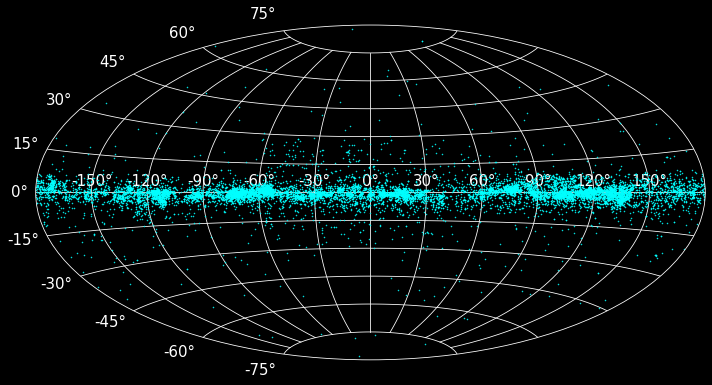

In [33]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd                #import desired libraries

df = pd.read_csv('Obfinew.csv')    #read the file you want to read using pandas

l = df['l(deg)']                   #define your columns from the dataframe that provide you l and b values 
b = df['b(deg)']

                                                            
c = SkyCoord(ra=l, dec=b, frame='icrs',unit = 'deg')  #convert the scale into -180 to +180 degrees using astropy
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian


#Plot the projection and set it based on your needs
plt.style.use('dark_background')                  #To set dark bg
fig=plt.figure(figsize=(12,7))                    #To set figure size
ax = fig.add_subplot(111, projection="aitoff")    #You can change aitoff to other types too
plt.grid(True)                                    #For grids  
plt.plot(ra_rad, dec_rad, '.', markersize=1, alpha=1, color='cyan')
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.tick_params(axis='x', colors='white')    #To set xticks colour
plt.savefig('aitob.jpg')           #To save the fig


## Sigma Clipping

The code below is not used in the project but has been added because of its general need in astronomy. 
Please note that this is a self developed code but there is an astropy module specially designed for sigma clipping and can be of great help.

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel("catalogue_final.xlsx")
outliers = []
threshold = 3
print(len(df['b']))

#Checking if there's anything outside the treshold
def check_outside(data, tresh):
    mean = np.mean(data)
    std_dev = np.std(data)
    val = tresh*std_dev
    for i in data:
        outside = np.abs((i - mean))
        if outside > val:
            return True #If there's something outside three sigma it'll immedeatly stop.
    else:
        return False #If the for loop is completed properly, it'll come to this and return true.

data = list(df['b']) #Taking the data from the file
print(len(data))
tresh = 3 #Setting treshold
iteration = 0


def repeated_clipping(data, tresh):
    iteration = 1
    while True:
        print("Iteration no:", iteration)
        iteration = iteration + 1
        if check_outside(data, tresh) == False: #Checks if there's any data that's outside the treshold
            print("Checks out")
            break
        else:
            mean = np.mean(data) #Taking mean of data
            std_dev = np.std(data) #Taking std dev of data
            print("Standard Deviation:", std_dev)
            val = std_dev * tresh #Setting a barrier value. Anything beyond this is removed
            not_outliers = [] #Stuff that's within the barrier is added to this list
            for i in range(len(data)): #Iterating over a for loop
                y = data[i] 
                dist = np.abs((y - mean)) #Finding the distance of the point from the mean
                if dist < val: #IF the distance is less than barrier value
                    not_outliers.append(y) #Not outliers is updated with this thing's value.
            data = not_outliers #Data is updated to whatever is not the outliers
    return data

while True:
    print(iteration)
    iteration = iteration + 1
    if check_outside(data, tresh) == False: #Checks if there's any data that's outside the treshold
        print("Checks out")
        break
    else:
        mean = np.mean(data) #Taking mean of data
        std_dev = np.std(data) #Taking std dev of data
        val = std_dev * tresh #Setting a barrier value. Anything beyond this is removed
        not_outliers = [] #Stuff that's within the barrier is added to this list
        for i in range(len(data)): #Iterating over a for loop
            y = data[i] 
            dist = np.abs((y - mean)) #Finding the distance of the point from the mean
            if dist < val: #IF the distance is less than barrier value
                not_outliers.append(y) #Not outliers is updated with this thing's value.
        data = not_outliers #Data is updated to whatever is not the outliers

len(repeated_clipping(data, tresh))

rp = repeated_clipping(data, tresh)

for num in df['b']:
    if num not in rp:
        df.drop(df.index[df['b'] == num], inplace=True)

#Plotting and line fitting using lmplot
a=sns.lmplot(x='l', y='b', data=df, line_kws={'color':'black'})
sns.scatterplot(y='b', x='l', data=df ,s=30)
plt.ylim(-90, +90)
sns.set_style("darkgrid")  
sns.color_palette("rocket", as_cmap=True)
a.fig.suptitle('l vs b curve')
#plt.savefig('lin_regression_curve.svg')
df.describe()         #to get all the details like mean, std dev, var etc. for the catalogue

## An example of Astropy sigma clipping

In [42]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import sigma_clip

df = pd.read_csv('Obfinew.csv')
random_var = df['z(kpc)']


#we are sigma clipping the random_var. Variable sigma=3 signifies till which value of sigma from mean you want to clip your data
newvar = sigma_clip(random_var, sigma=3, maxiters=None,
                             masked=False, copy=False)

print('No. of values remaining before sigma clipping: ' + str(len(random_var)))
print('No. of values remaining after sigma clipping: ' + str(len(newvar)))



No. of values remaining before sigma clipping: 14301
No. of values remaining after sigma clipping: 12929


## For Interquartile range

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
df=pd.read_csv('Obfinew.csv')
data= [num*1000 for num in df['z(kpc)'] if -1<num<1]       #Only taking the significant values closer to 0 kpc.
count=len(data)

# Using scipy.stats to calculate Interquartile range (IQR)
IQR = stats.iqr(data, interpolation = 'midpoint')
  
binsw=IQR*2/np.cbrt(count)  #binwidth calculation using formula from Freedman Diaconis method
    
print("IQR = "+str(IQR))
print("Binwidth = "+str(binsw))
print('No. of points after taking significant points: '+ str(count))
print('no.of bins=',count/binsw)   

IQR = 102.8205355
Binwidth = 8.510693851656757
No. of points after taking significant points: 14107
no.of bins= 1657.5616801506521


## Histogram of the data and Convertion into Scatter plot

Note that IQR is useful to find out the ample number of bins to reduce the error while curve fitting but IQR is not always a good method to visualize a histogram because naturally the number of bins would be higher for larger datasets. 

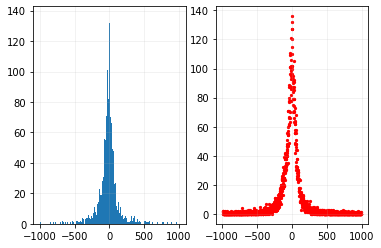

In [3]:
import matplotlib.pylab as plt
import numpy as np

plt.subplot(121)
# Usual histogram plot
n, bins, bars = plt.hist(data, bins=1657)  # output is two arrays
plt.grid(alpha=0.2)

#For scatter plot
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]    # To get the bin centers from the bin edges.
plt.subplot(122)
plt.scatter(bins_mean, n,s=5,color='r')
plt.grid(alpha=0.2)

## Fitting function using Scipy curve_fit
Note that this is a general code and can be used for any kind of fitting. The b value is scale height and x_0 is solar offset.

The scale height value is = 66.24
Error in Scale height is = 1.0


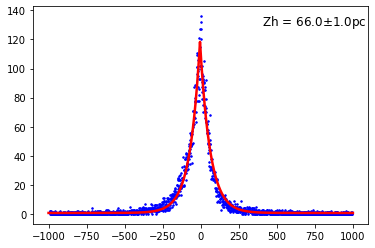

In [19]:
from scipy.optimize import curve_fit
def func(x, a, b,x_0,c):                              #Define the variables 
    return a*(np.exp(-np.abs((x-x_0)/b)))+c           #Define your function (we have use exponential decay fit here)
xdata=bins_mean
ydata=n
plt.plot(xdata,ydata,'b.',ms=3)

#define initial guess of the parameters given
initialG=[1000,60,10,10]

#define popt and pcov. pcov is the covariance matrix, square root of diagonals will give you the standard error in each parameter 
popt, pcov = curve_fit(func, xdata, ydata,initialG)

#define the fitting range
xFit=np.arange(-1000,1000,0.01)

plt.plot(xFit,func(xFit,*popt),label='fit: a=%5.3f, b=%5.3f,x_0=%5.3f,c=%5.3f'  % tuple(popt), color='r',linewidth=2.5)

#plt.label()           #optional 

#calculation of std error
perr = np.sqrt(np.diag(pcov))

#add text to the fig
plt.text(400,130,'Zh = '+ str(popt[1].round(0))+ '$\pm$'+str(perr[1].round(0))+'pc',fontsize=12)

print('The scale height value is = '+str(popt[1].round(2)))
print('Error in Scale height is = ' + str(perr[1].round(0)))

## Combined plot 

IQR = 102.8205355
Binwidth = 8.510693851656757
No. of points after taking significant points: 14107
no.of bins= 1657.5616801506521
The scale height value is = 66.24
Error in Scale height is = 1.0


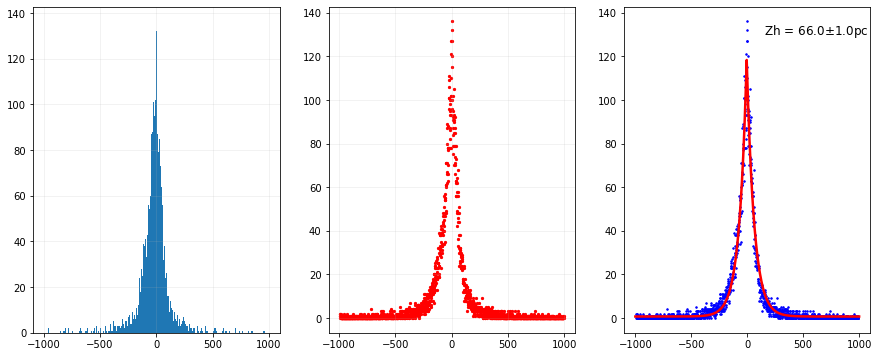

In [26]:
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from scipy import stats


df=pd.read_csv('Obfinew.csv')
data= [num*1000 for num in df['z(kpc)'] if -1<num<1]       #Only taking the significant values closer to 0 kpc.
count=len(data)

# Using scipy stats to calculate Interquartile range (IQR)
IQR = stats.iqr(data, interpolation = 'midpoint')
  
binsw=IQR*2/np.cbrt(count)  #binwidth calculation using formula from Freedman Diaconis method
    
print("IQR = "+str(IQR))
print("Binwidth = "+str(binsw))
print('No. of points after taking significant points: '+ str(count))
print('no.of bins=',count/binsw)   

fig=plt.figure(figsize=(15,6))
plt.subplot(131)
# Usual histogram plot
n, bins, bars = plt.hist(data, bins=1657)  # output is two arrays
plt.grid(alpha=0.2)

#For scatter plot
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]    # To get the bin centers from the bin edges.
plt.subplot(132)
plt.scatter(bins_mean, n,s=5,color='r')
plt.grid(alpha=0.2)



def func(x, a, b,x_0,c):                              #Define the variables 
    return a*(np.exp(-np.abs((x-x_0)/b)))+c           #Define your function (we have use exponential decay fit here)
xdata=bins_mean
ydata=n
plt.subplot(133)
plt.plot(xdata,ydata,'b.',ms=3)

#define initial guess of the parameters given
initialG=[1000,60,10,10]

#define popt and pcov. pcov is the covariance matrix, square root of diagonals will give you the standard error in each parameter 
popt, pcov = curve_fit(func, xdata, ydata,initialG)

#define the fitting range
xFit=np.arange(-1000,1000,0.01)

plt.plot(xFit,func(xFit,*popt),label='fit: a=%5.3f, b=%5.3f,x_0=%5.3f,c=%5.3f'  % tuple(popt), color='r',linewidth=2.5)

#plt.label()           #optional 

#calculation of std error
perr = np.sqrt(np.diag(pcov))

#add text to the fig
plt.text(150,130,'Zh = '+ str(popt[1].round(0))+ '$\pm$'+str(perr[1].round(0))+'pc',fontsize=12)

print('The scale height value is = '+str(popt[1].round(2)))
print('Error in Scale height is = ' + str(perr[1].round(0)))

The scale height value is = 67.1
Error in Scale height is = 1.0


(-10.0, 4000.0)

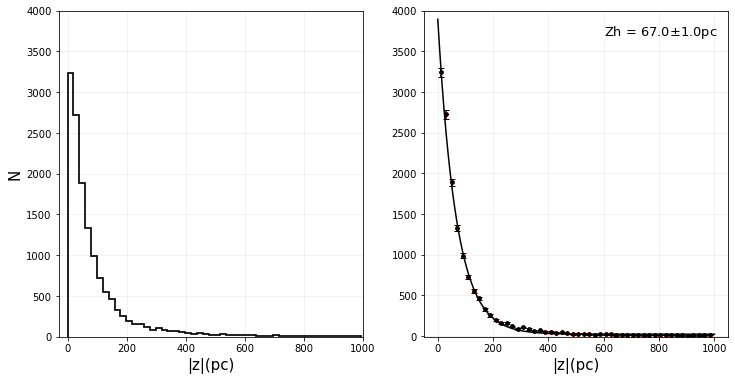

In [37]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

dataz=[(np.abs(x))*1000 for x in df['z(kpc)'] if np.abs(x)<1]


# Usual histogram plot

plt.figure(figsize=(12, 6))
plt.subplot(121)
nz, binsz, barsz = plt.hist(dataz, histtype='step', bins=50,color='black',linewidth=1.7)  # output is two arrays

#Calculation of Poisson error
rootN=np.sqrt(nz)
nup=nz+rootN
ndown=nz-rootN
yerr=rootN

nz1=nz.tolist()
nz1=nz1.append(0)
plt.grid(alpha=0.2)
plt.yticks(np.linspace(0,4000,9))

# Now we find the center of each bin from the bin edges
bins_meanz = [0.5 * (binsz[i] + binsz[i+1]) for i in range(len(nz))]
plt.grid(alpha=0.2)
plt.xlabel('|z|(pc)',fontsize=15)
plt.ylabel('N',fontsize=15)
plt.ylim(0,4000)
plt.xlim(-30,1000)





#For curve fitting

def func(x, a, b,x_0,c):
    return a*np.exp(-((x-x_0)/b))+c                 #Exponential decay fitting
xdata=bins_meanz
ydata=nz
yerr=rootN
plt.subplot(122)
plt.plot(xdata,ydata,'r.',ms=7)
initialG=[100,60,18,1.0]
poptL, pcovL = curve_fit(func, xdata, ydata,initialG)
plt.errorbar(xdata, ydata, yerr = yerr, fmt = '.', label = 'Data',ms=7, capsize=3, color='black')
xFitL=np.arange(0,1000,0.01)
plt.plot(xFitL,func(xFitL,*poptL),label='fit: a=%5.3f, b=%5.3f,x_0=%5.3f,c=%5.3f'  % tuple(poptL), color='black',linewidth=1.5)
plt.grid(alpha=0.2)
perrL = np.sqrt(np.diag(pcovL))
print('The scale height value is = '+str(poptL[1].round(2)))
print('Error in Scale height is = ' + str(perrL[1].round(0)))
plt.xlabel('|z|(pc)',fontsize=15)
plt.text(600,3700,'Zh = '+ str(poptL[1].round(0))+ '$\pm$'+str(perrL[1].round(0))+'pc',fontsize=13)
plt.ylim(-10,4000)

#plt.savefig('comb_poisson.png',dpi=1000)

The rest of the graphs can be made with simple python coding involving the libraries given above.